In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # For saving and loading models


In [ ]:
# 2. Load the dataset
data = pd.read_csv("/content/adult 3.csv")


In [ ]:
# 3. Display the first few rows of the dataset to understand its structure
print("3. First 5 rows of the dataset:")
print(data.head())
print("\n" + "="*50 + "\n")

3. First 5 rows of the dataset:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hou

In [ ]:
# 4. Get a concise summary of the DataFrame, including data types and non-null values
print("4. Dataset Information:")
data.info()
print("\n" + "="*50 + "\n")

4. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB




In [ ]:
# 5. Check for missing values (represented as '?' in this dataset)
# Replace '?' with NaN for proper missing value handling
print("5. Replacing '?' with NaN and checking for missing values:")
data.replace('?', np.nan, inplace=True)
print(data.isnull().sum())
print("\n" + "="*50 + "\n")

5. Replacing '?' with NaN and checking for missing values:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64




In [ ]:
# 6. Handle missing values by filling with the mode for categorical columns
# Identifying categorical columns (object type)
categorical_cols = data.select_dtypes(include=['object']).columns

print("6. Filling missing categorical values with the mode:")
for col in categorical_cols:
    if data[col].isnull().any(): # Check if there are any NaN values in the column
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)
        print(f"  Filled missing values in '{col}' with mode: '{mode_val}'")

print("\nMissing values after imputation:")
print(data.isnull().sum())
print("\n" + "="*50 + "\n")

6. Filling missing categorical values with the mode:
  Filled missing values in 'workclass' with mode: 'Private'
  Filled missing values in 'occupation' with mode: 'Prof-specialty'
  Filled missing values in 'native-country' with mode: 'United-States'

Missing values after imputation:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64




In [ ]:
# 7. Preprocessing the target variable 'income'
# Convert income to numerical: <=50K to 0, >50K to 1
print("7. Encoding the 'income' target variable:")
data['income'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
print("Unique values in 'income' after encoding:", data['income'].unique())
print("\n" + "="*50 + "\n")

7. Encoding the 'income' target variable:
Unique values in 'income' after encoding: [0 1]




In [ ]:
# 8. Separate features (X) and target (y)
X = data.drop('income', axis=1)
y = data['income']
print("8. Features (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\n" + "="*50 + "\n")

8. Features (X) and Target (y) separated.
Shape of X: (48842, 14)
Shape of y: (48842,)




In [ ]:
# 9. Identify numerical and categorical features for further preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
print("9. Identified Numerical Features:", list(numerical_features))
print("Identified Categorical Features:", list(categorical_features))
print("\n" + "="*50 + "\n")

# Store original categorical feature names before one-hot encoding for later use
original_categorical_features = list(categorical_features)

9. Identified Numerical Features: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Identified Categorical Features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']




In [ ]:
# 10. Apply One-Hot Encoding to categorical features
# This converts categorical variables into a format that can be provided to ML algorithms
print("10. Applying One-Hot Encoding to categorical features...")
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
print("Shape of X after One-Hot Encoding:", X.shape)
print("First 5 rows of X after encoding:")
print(X.head())
print("\n" + "="*50 + "\n")

10. Applying One-Hot Encoding to categorical features...
Shape of X after One-Hot Encoding: (48842, 97)
First 5 rows of X after encoding:
   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False               True   
1                False                   False               True   
2                 True                   False              False   
3                False                   False               True   
4                False                   F

In [ ]:
# 11. Apply Feature Scaling to numerical features using StandardScaler
# Scaling helps algorithms that are sensitive to the magnitude of features
print("11. Applying Feature Scaling to numerical features...")
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
print("First 5 rows of X after scaling numerical features:")
print(X.head())
print("\n" + "="*50 + "\n")

11. Applying Feature Scaling to numerical features...
First 5 rows of X after scaling numerical features:
        age    fnlwgt  educational-num  capital-gain  capital-loss  \
0 -0.995129  0.351675        -1.197259     -0.144804     -0.217127   
1 -0.046942 -0.945524        -0.419335     -0.144804     -0.217127   
2 -0.776316  1.394723         0.747550     -0.144804     -0.217127   
3  0.390683 -0.277844        -0.030373      0.886874     -0.217127   
4 -1.505691 -0.815954        -0.030373     -0.144804     -0.217127   

   hours-per-week  workclass_Local-gov  workclass_Never-worked  \
0       -0.034087                False                   False   
1        0.772930                False                   False   
2       -0.034087                 True                   False   
3       -0.034087                False                   False   
4       -0.841104                False                   False   

   workclass_Private  workclass_Self-emp-inc  ...  native-country_Portugal  

In [ ]:
# 12. Split the data into training and testing sets
# 80% for training, 20% for testing. stratify=y ensures equal proportion of income classes in train/test sets.
print("12. Splitting data into training and testing sets (80/20 split)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print("\n" + "="*50 + "\n")

12. Splitting data into training and testing sets (80/20 split)...
X_train shape: (39073, 97), y_train shape: (39073,)
X_test shape: (9769, 97), y_test shape: (9769,)




In [ ]:
# 13. Initialize the RandomForestClassifier model
# RandomForest is an ensemble method that generally performs well and is robust to overfitting.
print("13. Initializing RandomForestClassifier model...")
model = RandomForestClassifier(random_state=42)

13. Initializing RandomForestClassifier model...


In [ ]:
# 14. Train the model on the training data
print("14. Training the model...")
model.fit(X_train, y_train)
print("Model training complete.")
print("\n" + "="*50 + "\n")

14. Training the model...
Model training complete.




In [ ]:
# 15. Make predictions on the test data
print("15. Making predictions on the test data...")
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (income >50K)
print("Predictions made.")
print("\n" + "="*50 + "\n")

15. Making predictions on the test data...
Predictions made.




16. Evaluating the model's performance:
Accuracy: 0.8584

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7431
           1       0.74      0.63      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769


Confusion Matrix:
[[6913  518]
 [ 865 1473]]


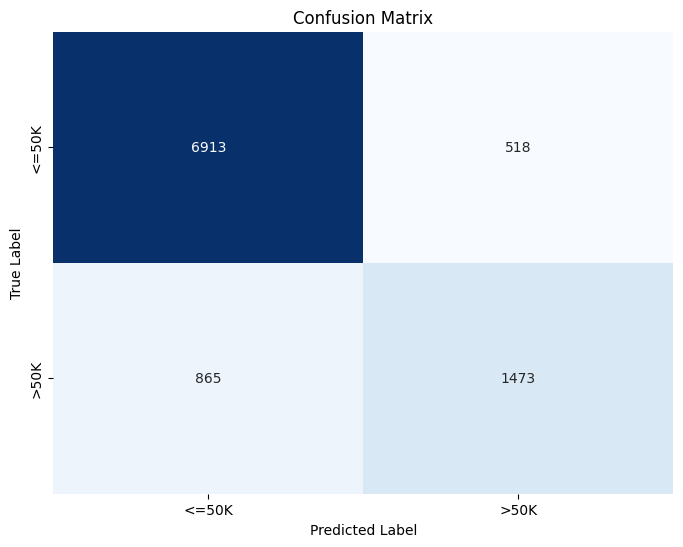

In [ ]:
# 16. Evaluate the model's performance
print("16. Evaluating the model's performance:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("\n" + "="*50 + "\n")

In [ ]:
# 17. Hyperparameter Tuning (Optional, but recommended for higher accuracy)
# This step can significantly improve model performance by finding the best parameters.
# Note: GridSearchCV can be computationally intensive and take a long time on large datasets.
# For a quicker run, you might reduce the param_grid or use RandomizedSearchCV.

print("17. Starting Hyperparameter Tuning with GridSearchCV (This may take a while)...")
param_grid = {
    'n_estimators': [100, 200], # Number of trees in the forest
    'max_depth': [10, 20, None], # Maximum depth of the tree
    'min_samples_split': [2, 5], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2] # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, # Number of folds for cross-validation
                           n_jobs=-1, # Use all available cores
                           verbose=2, # Verbosity level
                           scoring='accuracy') # Metric to optimize

grid_search.fit(X_train, y_train)

print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

print("\nBest score (accuracy) on training set:")
print(f"{grid_search.best_score_:.4f}")

17. Starting Hyperparameter Tuning with GridSearchCV (This may take a while)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Best score (accuracy) on training set:
0.8624



18. Evaluating the model with best parameters on the test set:
Accuracy with tuned model: 0.8653

Classification Report with tuned model:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7431
           1       0.78      0.61      0.68      2338

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769


Confusion Matrix with tuned model:
[[7030  401]
 [ 915 1423]]


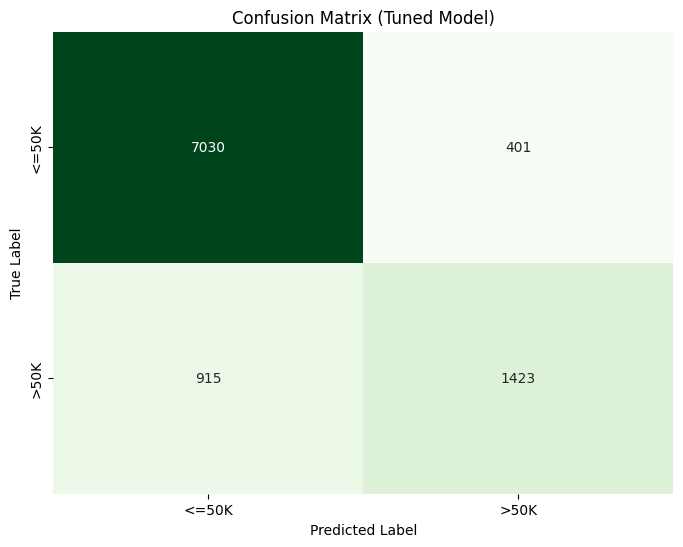

In [ ]:
# 18. Evaluate the model with the best parameters on the test set
print("\n18. Evaluating the model with best parameters on the test set:")
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy with tuned model: {accuracy_tuned:.4f}")

print("\nClassification Report with tuned model:")
print(classification_report(y_test, y_pred_tuned))

print("\nConfusion Matrix with tuned model:")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cm_tuned)

# Visualize the Confusion Matrix for the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()
print("\n" + "="*50 + "\n")

19. Analyzing Feature Importance:


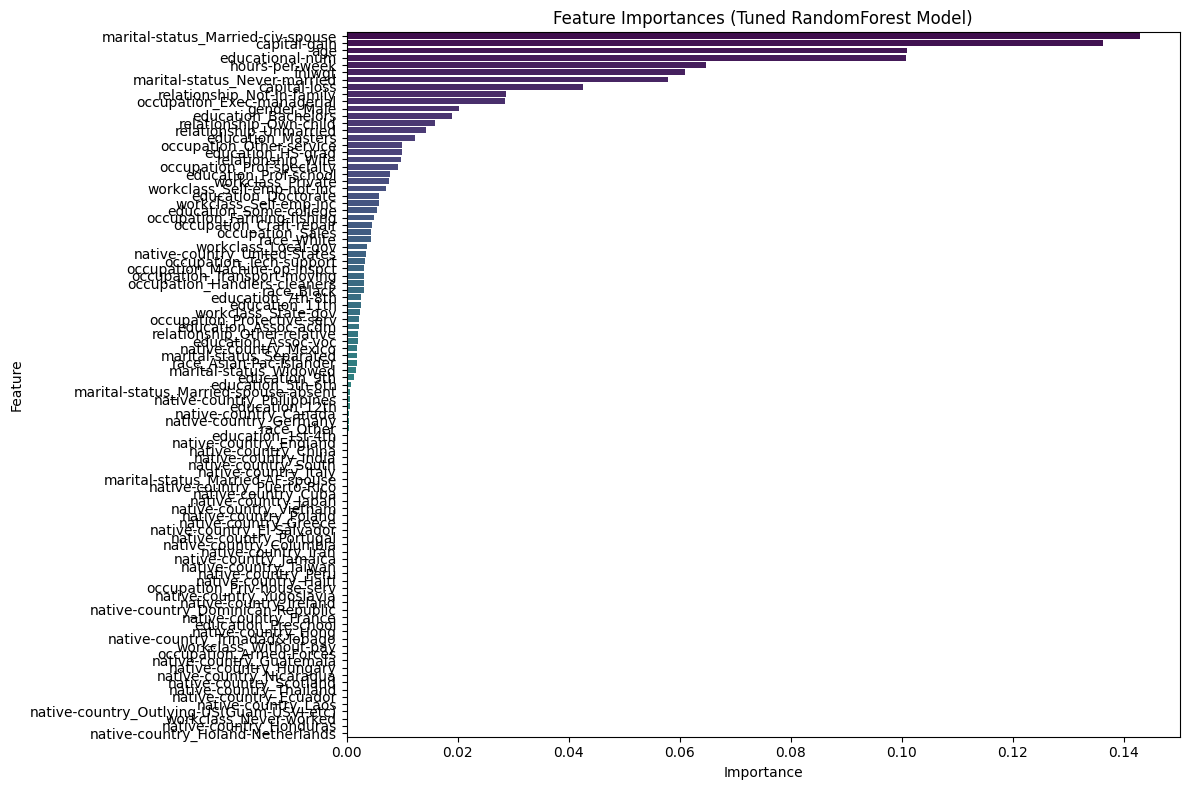

Top 10 most important features:
marital-status_Married-civ-spouse    0.142962
capital-gain                         0.136215
age                                  0.100997
educational-num                      0.100793
hours-per-week                       0.064752
fnlwgt                               0.060893
marital-status_Never-married         0.057950
capital-loss                         0.042577
relationship_Not-in-family           0.028807
occupation_Exec-managerial           0.028586
dtype: float64




In [ ]:
# 19. Feature Importance Analysis
# Understanding which features are most influential in the model's predictions
print("19. Analyzing Feature Importance:")
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances (Tuned RandomForest Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("Top 10 most important features:")
print(feature_importances.head(10))
print("\n" + "="*50 + "\n")

20. Plotting ROC Curve and calculating AUC Score:


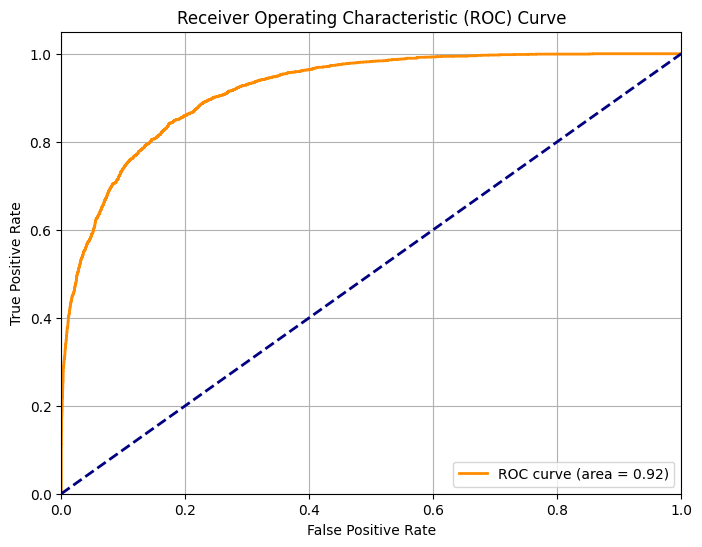

Area Under the Curve (AUC): 0.9181




In [ ]:
# 20. ROC Curve and AUC Score
# Visualizing the trade-off between true positive rate and false positive rate
print("20. Plotting ROC Curve and calculating AUC Score:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tuned)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"Area Under the Curve (AUC): {roc_auc:.4f}")
print("\n" + "="*50 + "\n")

In [ ]:
# 21. Saving the Trained Model
# Saving the best model and the scaler for future use
print("21. Saving the trained model and scaler...")
model_filename = 'best_salary_predictor_model.joblib'
scaler_filename = 'scaler.joblib'

joblib.dump(best_model, model_filename)
joblib.dump(scaler, scaler_filename)

print(f"Model saved as '{model_filename}'")
print(f"Scaler saved as '{scaler_filename}'")
print("\n" + "="*50 + "\n")

21. Saving the trained model and scaler...
Model saved as 'best_salary_predictor_model.joblib'
Scaler saved as 'scaler.joblib'




In [ ]:
# 22. Loading the Model and Scaler (Demonstration)
# How to load the saved model and scaler
print("22. Demonstrating loading the saved model and scaler...")
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
print("Model and scaler loaded successfully.")
print("\n" + "="*50 + "\n")

22. Demonstrating loading the saved model and scaler...
Model and scaler loaded successfully.




In [ ]:
# 23. Example Prediction on New Data
# Create a hypothetical new data point and predict its income
print("23. Performing an example prediction on new hypothetical data:")

# Create a dictionary for a hypothetical new employee
# Ensure all original features are present and in the correct order/type
new_employee_data = {
    'age': 35,
    'workclass': 'Private',
    'fnlwgt': 200000,
    'education': 'Bachelors',
    'educational-num': 13,
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Exec-managerial',
    'relationship': 'Husband',
    'race': 'White',
    'gender': 'Male',
    'capital-gain': 5000,
    'capital-loss': 0,
    'hours-per-week': 45,
    'native-country': 'United-States'
}

# Convert to DataFrame
new_data_df = pd.DataFrame([new_employee_data])

print("Hypothetical new employee data:")
print(new_data_df)

# Preprocess the new data using the same steps as the training data
# 1. One-Hot Encode categorical features
# We need to ensure new_data_df has the same columns as X_train after one-hot encoding.
# Use reindex to align columns, filling missing with 0 (for categories not present in new data)
new_data_df_encoded = pd.get_dummies(new_data_df, columns=original_categorical_features, drop_first=True)

# Align columns with the training data's columns (X_train.columns)
# This is crucial because new data might not have all categories present in training data
# or might have categories not seen in training data.
missing_cols = set(X_train.columns) - set(new_data_df_encoded.columns)
for c in missing_cols:
    new_data_df_encoded[c] = 0
# Ensure the order of columns is the same as X_train
new_data_df_encoded = new_data_df_encoded[X_train.columns]

# 2. Scale numerical features
new_data_df_encoded[numerical_features] = loaded_scaler.transform(new_data_df_encoded[numerical_features])

# Make prediction
predicted_income_class = loaded_model.predict(new_data_df_encoded)
predicted_income_proba = loaded_model.predict_proba(new_data_df_encoded)[:, 1]

income_status = ">50K" if predicted_income_class[0] == 1 else "<=50K"

print(f"\nPredicted income for the new employee: {income_status}")
print(f"Probability of earning >50K: {predicted_income_proba[0]:.4f}")
print("\n" + "="*50 + "\n")

23. Performing an example prediction on new hypothetical data:
Hypothetical new employee data:
   age workclass  fnlwgt  education  educational-num      marital-status  \
0   35   Private  200000  Bachelors               13  Married-civ-spouse   

        occupation relationship   race gender  capital-gain  capital-loss  \
0  Exec-managerial      Husband  White   Male          5000             0   

   hours-per-week native-country  
0              45  United-States  

Predicted income for the new employee: <=50K
Probability of earning >50K: 0.3218




In [ ]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy with tuned model: {accuracy_tuned:.4f}")

Accuracy with tuned model: 0.8653
